## Lecture-03 Gradient Descent and Dymanic Programming

In this week, we need complete following tasks:
+ Re-review the course online programming; 
+ Choose 1 - 2 books which you interested and keep reading; 
+ Answer the review questions
+ Prepare the basic requirement of our 1st project. 

### Part I Review the online programming. 

### Part 2: change loss function from $loss = \frac{1}{n}\sum{(y_i - \hat(y_i))^2}$ to $loss = \frac{1}{n}\sum{|y_i - \hat{y_i}|}$, and using your mathmatical knowledge to get the right partial formual. Implemen the gradient descent code.

### ***答案见   assignment-02***

### Part 3: Finish the Solution Parse Part of Edit-Distance

In [1]:
solution = []

from functools import lru_cache


@lru_cache(maxsize=2 ** 10)
def edit_distance(string1, string2):
    if len(string1)+len(string2) == 0: return (0,[])
    if len(string1) == 0:
        zero_min, zero_path = edit_distance(string1, string2[:-1])
        return zero_min+1, zero_path+[('*', string2[-1])]
    if len(string2) == 0:
        zero_min, zero_path = edit_distance(string1[:-1], string2)
        return zero_min+1, zero_path+[(string1[-1], '*')]

    tail_s1 = string1[-1]
    tail_s2 = string2[-1]
    left_min, left_path = edit_distance(string1[:-1], string2)
    right_min, right_path = edit_distance(string1, string2[:-1])

    candidates = [
        (left_min + 1, left_path+[(tail_s1, '*')]),  # string 1 delete tail
        (right_min + 1, right_path+[('*', tail_s2)]),  # string 1 add tail of string2
    ]
    left_down_min, left_down_path = edit_distance(string1[:-1], string2[:-1])
    both_forward = left_down_min+0 if tail_s1 == tail_s2 else left_down_min+1
    both_path = left_down_path +[(tail_s1, tail_s2)]

    candidates.append((both_forward, both_path))

    min_distance, path = min(candidates, key=lambda x: x[0])

    solution.append((string1, string2, path[-1]))

    return min_distance, path

s1,s2 = 'ABdersqqqCCMMM', 'ABfrdeCCMMMMM'
num, path = edit_distance(s1, s2)
print('minimun distance:',num)
up = [a for a, b in path]
down = [b for a, b in path]
arrow = ['|' for _ in path]
print(' '.join(up))
print(' '.join(arrow))
print(' '.join(down))


minimun distance: 8
A B d e r s q q q C C M M M * *
| | | | | | | | | | | | | | | |
A B f * r d e * * C C M M M M M


### Part 4 Choose 1 - 2 books to keep reading: 

+ SICP, Structure and Interpretation of Computer Programming. 
+ Introduction to Algorithms 
+ Artificial Intelligence A Modern Approach (3rd Edition) 
+ Code Complete 2 
+ Programming Pearls 
+ Deep Learning
+ 黑客与画家
+ 数学之美
+ Fluent Python
+ Hands on Tensorflow
+ Conference: NIPS_ ICML_ ICLR_ ACL_ AAAI

> most books you may find in our github: https://github.com/Computing-Intelligence/References

## Part 5-1: review machine learning

1. Why do we use Derivative / Gredient to fit a target function?¶

Ans:

2. In the words 'Gredient Descent', what's the Gredient and what's the Descent?¶

Ans:


3. What's the advantages of the 3rd gradient descent method compared to the previous methods?

Ans:

4. Using the simple words to describe: What's the machine leanring.¶

Ans:

#### ***这部分作业已经在 assignment-02.ipynb作答***

### Part 5: Answer following questions: 

1. Why do we need dynamic programming? What's the difference of dynamic programming and previous talked `search` problme? 

**因为在算法中有很多重复的子问题，如果每次都重复计算这类子问题，那么很多算法的计算量将会是天文数字。**
**动态规划常用来解决具有重复子问题并有最优子结构的算法，通常可以用查表的方式实现。 搜索问题用来处理具有图结构的问题。**

2. Why do we still need dynamic programming? Why not we train a machine learning to fit a function which could get the `right` answer based on inputs?

**很多问题可以通过归纳总结到经典算法来解决，并不是每一种问题，都能用机器学习来拟合一个函数完美的解决。有时候经典算法（比如动态规划）就可以解决一些看起来很复杂的问题。**

3. Can you catch up at least 3 problems which could solved by Dynamic Programming? 

1. **编辑距离。搜索引擎，拼写纠错，提示最接近的正确答案**
2. **解决旅行商问题**
3. **背包问题**

4. Can you catch up at least 3 problems wich could sloved by Edit Distance? 

1. **拼写纠错**
2. **基因序列对比**
3. **机器翻译评价函数**

5. Please summarize the three main features of Dynamic Programming, and make a concise explain for each feature. 


1. **建立在子问题的解决之上**
2. **全局最优解建立在子问题的最优解之上**
3. **子问题一旦确定，就不在改变**

6. What's the disadvantages of Dynamic Programming? (You may need search by yourself in Internet)

- **为了存储子问题的结果，非常浪费内存**
- **相比于贪心算法，问题规模庞大，在运行时执行会很慢**
- **动态规划没有固定的形式，几乎每个问题都有其独特的算法形式**

## Part 6 Preparation of Project-01

1. Using python Flask or Bottle to finish your first simple web app:
> https://bottlepy.org/

2. Learn what's the SQL, and try some simple SQL operations:
> https://www.w3schools.com/sql/sql_intro.asp

3. Learn what's the HTML ( *ONLY* need to know the basic things)
> https://getbootstrap.com/; https://www.w3schools.com/html/

### answer: ***已经有相关经验***

### (Optinal) Finish the k-person-salesman problem:

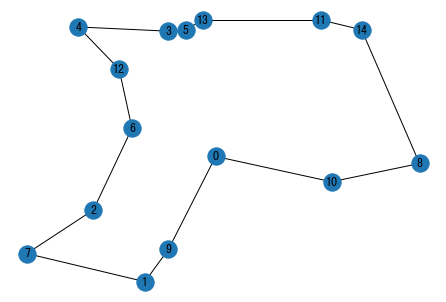

In [17]:
import random
import matplotlib.pylab as plt

import pandas as pd

import numpy as np

N = 15

latitudes = np.random.randint(-100,100,(2,N))
latitudes[:,0] = [0,0]

#plt.scatter(latitudes[0], latitudes[1])

distance = np.zeros((N,N))

for i in range(N):
    for j in range(N):
        distance[i][j] = np.sqrt(np.square(latitudes[0,i]-latitudes[0,j])+np.square(latitudes[1,i]-latitudes[1,j]))

@lru_cache(maxsize=2**18)
def get_shortest_path(city,uv_city):
    if len(uv_city)==0:        
        return distance[start,city],[start,city]
    all_possible_distance = []
    for c in uv_city:
        new_uv_city = sorted(list(uv_city))
        new_uv_city.remove(c)
        new_uv_city = tuple(new_uv_city)
        distance_path = get_shortest_path(c, new_uv_city)
        c_dist,c_path = distance_path
        distance_city_c = distance[city,c]
        new_distance = (distance_city_c+c_dist, c_path+[city])
        all_possible_distance.append(new_distance)
    all_possible_distance.sort(key=lambda x:x[0])
    best_options = all_possible_distance[0]
    return best_options
    

start = 6
min_distance = {}
uv = tuple(sorted([i for i in range(N) if i!=start]))

min_distance,path = get_shortest_path(start,uv)

import networkx as nx

import copy
up = copy.copy(path)
up.pop(-1)
down = copy.copy(path)
down.pop(0)
location = {i:latitudes[:,i].tolist() for i in range(N)}
graph = {k:[v] for k,v in zip(up,down)}
city_with_road = nx.Graph(graph)
for n,x in location.items():
    city_with_road.nodes[n]['pos'] = x
nx.draw(city_with_road,location,with_labels=True,node_size=300)

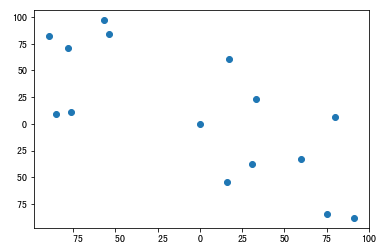

In [11]:
plt.scatter(latitudes[0], latitudes[1])

给定一个初始点 𝑃, 已经 𝑘个车辆，如何从该点出发，经这 k 个车辆经过所以的点全部一次，而且所走过的路程最短?

例如：

In [14]:
chosen_p = (-50, 10)
chosen_p2 = (1, 30)
chosen_p3 = (99, 15)

In [4]:
import matplotlib.pyplot as plt

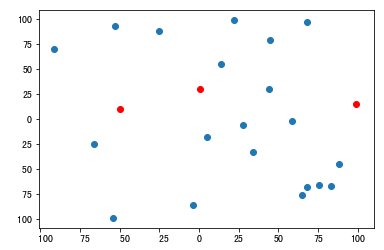

In [15]:
plt.scatter(latitudes, longitude)
plt.scatter([chosen_p[0]], [chosen_p[1]], color='r')
plt.scatter([chosen_p2[0]], [chosen_p2[1]], color='r')
plt.scatter([chosen_p3[0]], [chosen_p3[1]], color='r')

shuro